### Preliminary necessary functions

Here we introduce basic necessary functions and libraries so that the rest of the notebook works correctly. Program written in Jupyter Notebook 6.1 with Python Version around 3.7.


In [1]:
#python libraries, and files to make graphs
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('matplotlibrc.py')

In [2]:
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

In [4]:
def signo(i,io):
    if(i>io):
        return 1
    return -1

In [5]:
#SIR traditional model
def solve_sir_traditional(beta,gamma,N,I0,R0,tf,dt):
    #solves sir conventional model given parameters + initial conditions + tfinal + dt
    n = int((tf/dt) + 1) #number of steps
    S0 = 1 - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    beta_actual = []    
    #initial time + initial conditions
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    #now we do all the euler steps
    for j in range(n):
        beta_actual.append(beta) 
        sj = S[j] + dt*(-(beta) * S[j] * I[j])
        ij = I[j] + dt*((beta) * S[j] * I[j] - gamma * I[j])
        rj = R[j] + dt*(gamma * I[j])
        tj = (j+1)*dt
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    beta_actual.append(beta) 
    return t,S,I,R,beta_actual

In [6]:
#SIR modified model with beta = beta_0 - alpha*((I/Io)^2) and delay 
def solve_sir_new_delay(beta0,gamma,alpha,io,N,I0,R0,tf,dt,delay):
    n = int((tf/dt) + 1) #number of steps
    S0 = 1 - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    beta_act_t = []
    for j in range(delay-1):
        t.append(0)
        S.append(S0)
        I.append(0)
        R.append(0)
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    #now we do the euler step thing
    for j in np.arange(delay-1,n+delay):
        beta_actual = (beta0 - alpha*((I[j-delay]/io)**2)) #the key difference with the previous model
        beta_act_t.append(beta_actual)
        sj = S[j] + dt*(-beta_actual*S[j]*I[j]) #modified w/delay
        ij = I[j] + dt*(beta_actual*S[j]*I[j] - gamma*I[j]) #modified w/delay
        rj = R[j] + dt*(gamma*I[j]) #modified w/delay
        tj = (j+1)*dt #the same as before, as it should be
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    return t[delay:],S[delay:],I[delay:],R[delay:],beta_act_t

In [7]:
#SIR modified model with beta = beta_0 - alpha*((I/Io)^2) and delay 
#for interactive visualization with the library bokeh.js
def solve_sir_new_delay_interactive(alpha,io,N,tf,delay):
    beta0=0.15 
    gamma=0.075
    I0 = 1/N
    R0 = 0
    dt = 1
    n = int((tf/dt) + 1) #number of steps
    S0 = 1 - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    beta_act_t = []
    for j in range(delay-1):
        t.append(0)
        S.append(S0)
        I.append(0)
        R.append(0)
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    #now we do the euler step thing
    for j in np.arange(delay-1,n+delay):
        beta_actual = (beta0 - alpha*((I[j-delay]/io)**2)) #the key difference with the previous model
        beta_act_t.append(beta_actual)
        sj = S[j] + dt*(-beta_actual*S[j]*I[j]) #modified w/delay
        ij = I[j] + dt*(beta_actual*S[j]*I[j] - gamma*I[j]) #modified w/delay
        rj = R[j] + dt*(gamma*I[j]) #modified w/delay
        tj = (j+1)*dt #the same as before, as it should be
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    p = figure(title="SIR Model - S,I,R", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
    fechas = np.arange(len(I[delay:]))
    p.line(fechas,I[delay:], line_color="red", line_width=1.5, alpha=0.8,legend_label='Infectados')
    p.line(fechas,S[delay:], line_color="blue", line_width=1.5, alpha=0.8,legend_label='Susceptibles')
    p.line(fechas,R[delay:], line_color="green", line_width=1.5, alpha=0.8,legend_label='Recuperados')
    show(p, notebook_handle=True)
    push_notebook()
    p2 = figure(title="SIR Model - Rt", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
    p2.line(fechas, np.array(beta_act_t)*S[delay:]/(0.075), line_color="green", line_width=1.5, alpha=0.8,legend_label='Beta')
    show(p2, notebook_handle=True)
    push_notebook()
    #return t[delay:],S[delay:],I[delay:],R[delay:],beta_act_t

### Traditional SIR Model 

Here we test the traditional SIR model. The results are as expected, based on what we know. Then, we plot S,I,R as functions of time, and the reproductive ratio R as well. The last one is calculated as $R_t = (\beta  S(t))/\gamma = R_0 \: S(t)$ (eq. 1)

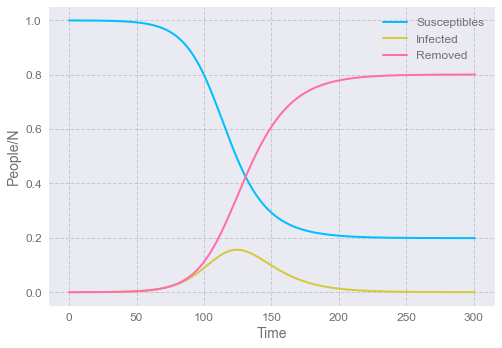

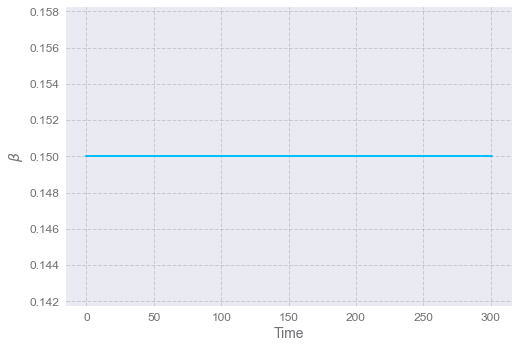

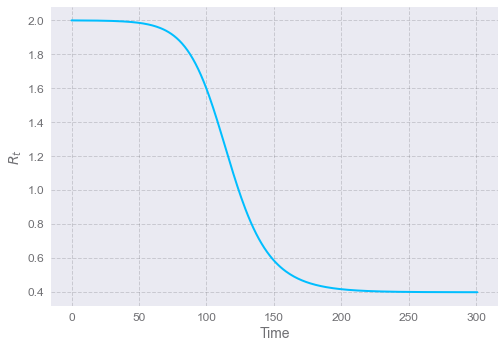

In [8]:
N = 10000.0
t1,S1,I1,R1,b1 = solve_sir_traditional(0.15, 0.075,N,1/N,0.0,300.0,1)
plt.figure(1)
plt.plot(t1,S1,label='Susceptibles')
plt.plot(t1,I1,label='Infected')
plt.plot(t1,R1,label='Removed')
plt.xlabel('Time')
plt.ylabel('People/N')
plt.legend(fontsize=12)
plt.figure(2)
plt.plot(b1)
plt.xlabel('Time')
plt.ylabel(r'$\beta$')
plt.figure(3)
plt.xlabel('Time')
plt.ylabel(r'$R_t$')
plt.plot((np.array(b1)/0.075)*S1)

### New SIR Model 

Here we test the new modified SIR model.This model main modification consists on changing beta from a constant to a quadratic function of the proportion of infected (t-d) days before the day t. Therefore, the new expression for beta is as follows:

$\beta = \beta_0 - \alpha \: (i(t-d)/i_{0})^2$ (eq. 2)

where beta_0, alpha and i_o are positive constants. This model is a generalizacion of the traditional SIR model, which we can easily get back setting alpha = 0, and adjusting beta_0 to the previous value. Finally, the constant i_o works as a scale for the proportion of infected people in a population. As indicated before (eq. 2), the number $d$ corresponds to the delay time. 

The aim of this model is reproduce the real life behaviour in a population. If the proportion of infected people is high, indicating a much higher pathogen circulation, people tend to guard themselves further. For example, staying home, restricting social gatherings or using masks. The same happens with organizations, such as governments, who may put futher sanitary measures and restrictions in place. As a result, it's expected that the transmittion rate decreases. 

Let us make a first exploration of the possible behaviours of this dynamical system in the following cell, with the interactive library Bokeh.js:

In [9]:
interact(solve_sir_new_delay_interactive, alpha=(0.01,10),io=(0.01,5),N=(1000,100000),tf=(300,5000),delay=(1,20))

interactive(children=(FloatSlider(value=5.005, description='alpha', max=10.0, min=0.01), FloatSlider(value=2.5…

<function __main__.solve_sir_new_delay_interactive(alpha, io, N, tf, delay)>

Here, we keep $\beta_0 = 1.15$ and $\gamma = 1/14 = 0.075$ constant, such that $R_{0} = \beta_{0}/\gamma = 2$, the value of the basic reproductive ratio of covid-19. Generally speaking, both values could be changed, as easily as we change alpha, io or the delay time. 
We observe that, for certain parameter values, we get a behaviour similar to which emerging from the traditional SIR model. However, for other parameter values, we observe oscillations in S,I and R quantities. These are also present in the reproductive number R_t, and appear to be oscillations around the unity. As we'll later see, this replicates what happens in a great deal of real-life populations. 
Other comments:
- It's remarkable that these oscillations ocurr around the unity, which is not the basic reproductive ratio of the infectious disease, both in real life and in this model
- It's a direct product of adding a delay to this model. We can observe that if delay = 0, then no oscillations are present, for any reasonable parameter values. 
- Apart from reproducing this behaviour, we wish to establish a direct quantitative relationship between the model and real-life covid cases in Argentinian provinces and cities. 

### Evolution with changing delay time $d$

Here, we leave parameters fixed, and we investigate what happens with changing delay time values $d$. In all cases, $\alpha = 5$, $\beta = 0.15$, $\gamma = 0.075$ and $N=10000$. We wish to understand the influence the delay time has in oscillation amplitude and frequency. For that, we use Python libraries to detect maximum and minimum value peaks in the $R_{t}$ curves. 

In the following graph, we have I and $R_t$ as fuctions of time, for different values of $d$. For some of them and having fixed the other parameter values, there's the presence of oscillations with time. 

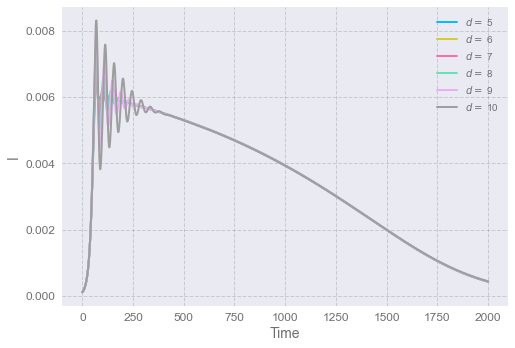

In [10]:
delays = [5,6,7,8,9,10]
for i in delays:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,0.05,N,1/N,0.0,2000.0,1.0,i)
    plt.plot(I9,label=r'$d=$ '+str(i))
    plt.ylabel('I')
    plt.xlabel('Time')
    plt.legend()

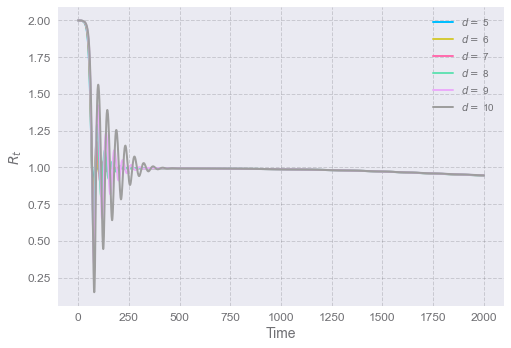

In [11]:
for i in delays:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,0.05,N,1/N,0.0,2000.0,1.0,i)
    if(min(b9)>0):
        plt.plot(b9*S9/(0.075),label=r'$d=$ '+str(i))
    plt.xlabel('Time')
    plt.ylabel(r'$R_t$')
    plt.legend()

Now, we'll compute both the amplitude and the distances between local maxima and distances between local minima, as indicators of oscillation period. As well, we'll also calculate the amplitude as the difference between the maximum and the minimum points, for all present oscillations. 

In [12]:
delays = [5,6,7,8,9,10]
amplitudes = []
freq_dist = []
for i in delays:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,0.05,N,1/N,0.0,2000.0,1.0,i)
    a = b9*S9/(0.075)
    peaksmax, _ = find_peaks(a, height=0)
    peaksmin, _ = find_peaks(-a,height=-2)
    peaksmax = peaksmax[1:]
    #print("dias de delay:", i)
    #plt.plot(a)
    #plt.plot(peaksmax, a[peaksmax], "x")
    #plt.plot(peaksmin, a[peaksmin], "x")
    #plt.plot(np.zeros_like(a), "--", color="gray")
    #amplitudes
    amplitudes.append(a[peaksmax]-a[peaksmin])
    #freq distancias
    freq_dist.append(([list(np.diff(np.array(peaksmax))),list(np.diff(np.array(peaksmin)))]))
    #plt.show()

##### - Amplitudes
First, we graph oscillation amplitud as a function of the number of oscillation $n$, for the different time delays, in a range from 5 to 10. Here, we see that oscillation amplitude decays with $n$, approaching zero as $R_{t}$ approaches 1. As well, $n$ appears to increase with the time delay, meaning that a bigger time delay results in more oscillations before the stationary state. The reduction of the amplitude with oscillation number appears to be exponential, at least in a certain range of $n$ values. 

Text(0, 0.5, 'Amplitude')

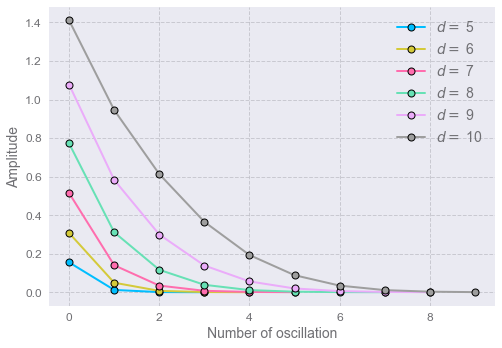

In [13]:
for i in range(len(amplitudes)):
    plt.plot(amplitudes[i],'-o',label=r'$d=$ '+str(delays[i]))
plt.legend(fontsize=14)
plt.xlabel('Number of oscillation')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude (log)')

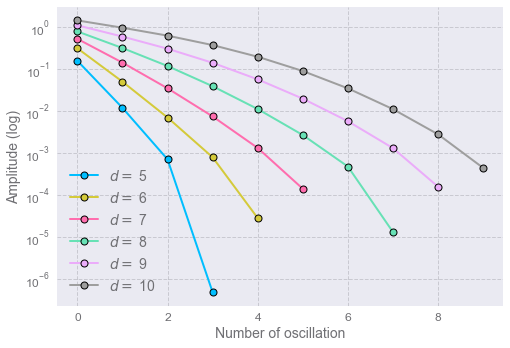

In [14]:
for i in range(len(amplitudes)):
    plt.plot(amplitudes[i],'-o',label=r'$d=$ '+str(delays[i]))
    plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Number of oscillation')
plt.ylabel('Amplitude (log)')

##### - Amount of oscillations

We can also study the number $n$ as a function of $d$, which is done in the following graph. It reflects what we could see from the previous graph: that $n$ tends to increase as $d$ does, almost linearly.

Text(0, 0.5, '$n$')

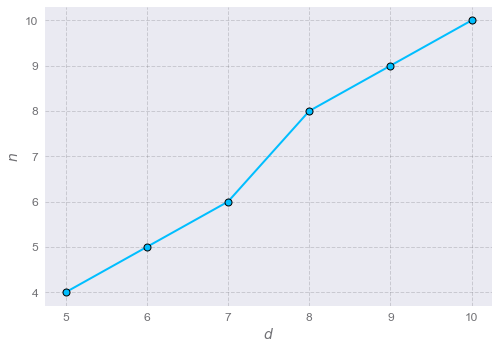

In [15]:
cant_oscilaciones = []
for i in range(len(amplitudes)):
    cant_oscilaciones.append(np.array(list(amplitudes[i])).shape[0])
plt.plot(delays,cant_oscilaciones,'-o')
plt.xlabel(r'$d$')
plt.ylabel(r'$n$')

##### - Frequencies

In the following plot, we graph distance between sucessive local maxima and sucessive local minima as functions of oscillation number $n$, and for the different $d$ values analyzed. We observe that these distances are approximately the same, and their similarity is more remarkable for higher values of $d$ and lower values of $n$.

Text(0, 0.5, 'Distance')

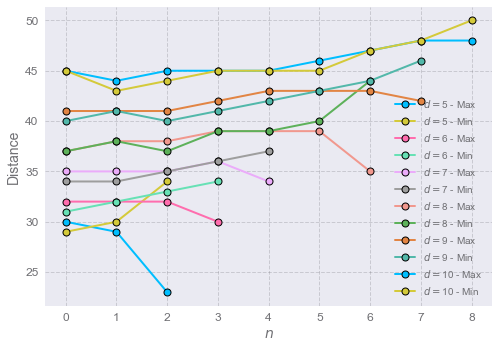

In [16]:
for i in range(len(freq_dist)):
    plt.plot(freq_dist[i][0],'-o',label=r'$d=$'+str(i+5)+' - Max')
    plt.plot(freq_dist[i][1],'-o',label=r'$d=$'+str(i+5)+' - Min')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Distance')

Now, we can compute the mean distance using both quantities calculated before, and we get a sense of the mean distance between oscillations. This distance tends to increase both with $n$ and $d$. That means, oscillations become more sparse as $R_t$ tends to one, and more so for higher values of time delay. 

Text(0, 0.5, 'Distance')

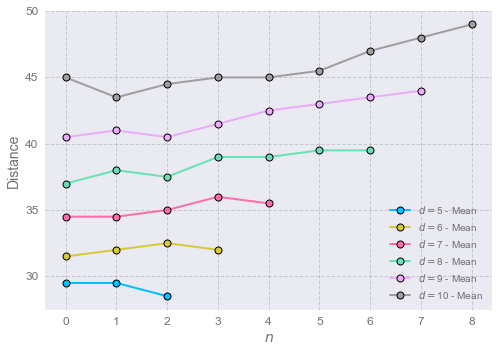

In [17]:
for i in range(len(freq_dist)):
    plt.plot((np.array(freq_dist[i][0])+np.array(freq_dist[i][1]))/2,'-o',label=r'$d=$'+str(i+5)+' - Mean')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Distance')

### Evolution with changing $\alpha$

Next, we leave the delay $d$ and the rest of the parameters fixed, except for $\alpha$. This is the coefficient which regulates the social response to the proportion of infected people. The analysis is analogous to what was done for varying $d$, with $\alpha$ in a range between $0.01-12$. This is a sensible range for this parameter, so as not to have negative values of $R_t$. 

In [18]:
alpha = [0.01,0.05,0.5,2,5,8,10,12]
cant_oscilaciones = []
amplitudes = []
freq_dist = []

In the following plots, we present I and $R_t$ as functions of time, for $\alpha$ in the range mentioned beforehand. For very low values of $\alpha$, there are no oscilattions. This is expected, since it means that the social reaction is almost nonexistant, and the situation is similar to the traditional SIR model. On the other hand, we observe that oscillations become present when $\alpha$ is increased. In particular, $R_t$ begins to oscillate around the unity, an already mentioned behaviour present in real life populations.

Text(0, 0.5, 'I')

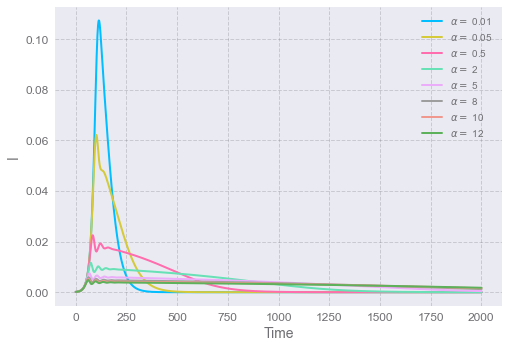

In [19]:
for i in alpha:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,i,0.05,N,1/N,0.0,2000.0,1.0,8)
    plt.plot(I9,label=r'$\alpha =$ '+str(i))
    plt.legend()
plt.xlabel('Time')
plt.ylabel('I')

Text(0, 0.5, '$R_t$')

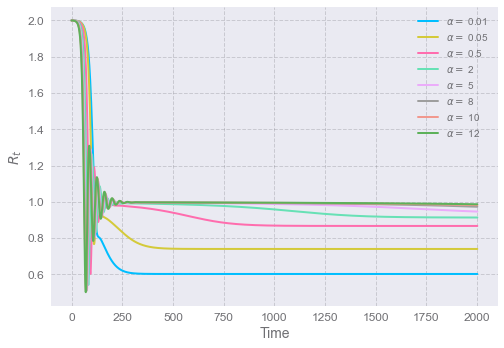

In [20]:
for i in alpha:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,i,0.05,N,1/N,0.0,2000.0,1.0,8)
    if(min(b9)>0):
        plt.plot(b9*S9/(0.075),label=r'$\alpha =$ '+str(i))
    plt.legend()
plt.xlabel('Time')
plt.ylabel(r'$R_t$')

In [21]:
for i in alpha:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,i,0.05,N,1/N,0.0,2000.0,1.0,8)
    a = b9*S9/(0.075)
    peaksmax, _ = find_peaks(a, height=0)
    peaksmin, _ = find_peaks(-a,height=-2)
    if len(peaksmax)!=len(peaksmin):
        if len(peaksmax)>len(peaksmin):
            peaksmax = peaksmax[1:]
        else:
            peaksmin = peaksmin[1:]
    #print("dias de delay:", i)
    #plt.plot(a)
    #plt.plot(peaksmax, a[peaksmax], "x")
    #plt.plot(peaksmin, a[peaksmin], "x")
    #plt.plot(np.zeros_like(a), "--", color="gray")
    #amplitudes
    amplitudes.append(a[peaksmax]-a[peaksmin])
    #freq distancias
    freq_dist.append(([list(np.diff(np.array(peaksmax))),list(np.diff(np.array(peaksmin)))]))
    #plt.show()

##### - Amplitude

Firstly, we compute oscillation amplitude as a function of oscillation number $n$, for the different $\alpha$ coefficients. As remarked before, there are little to no oscillations for lower values of $\alpha$. That's why there's only one yellow point in this graph. Meanwhile, for $\alpha = 12$, there are around 9 oscillations in both I and $R_t$. Another thing that stems from this plot, is that oscillation amplitudes as functions of $n$ follow similar rules for different $\alpha$, while keeping the rest of the parameters fixed. 

Text(0, 0.5, 'Amplitude')

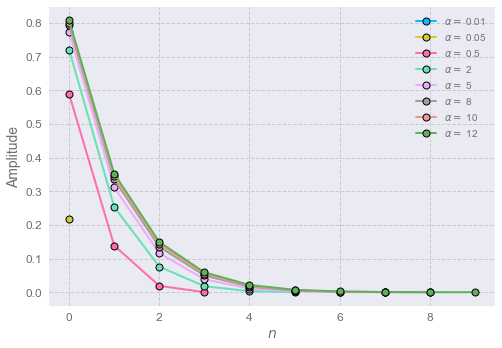

In [22]:
for i in range(len(amplitudes)):
    plt.plot(amplitudes[i],'-o',label=r'$\alpha=$ '+str(alpha[i]))
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Amplitude')

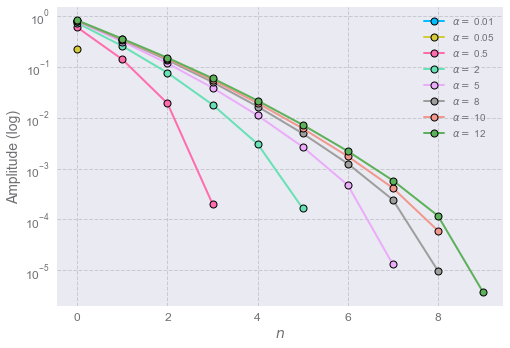

In [23]:
for i in range(len(amplitudes)):
    plt.plot(amplitudes[i],'-o',label=r'$\alpha=$ '+str(alpha[i]))
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Amplitude (log)')
plt.yscale('log')

##### - Amount of oscillations

Next, we observe that the total number of oscillations $n_{t}$ increases with growing values of $\alpha$. It does so at a fast rate at the beginning and tends to stay stable towards highest $\alpha$ values. 

Text(0, 0.5, '$n_{total}$')

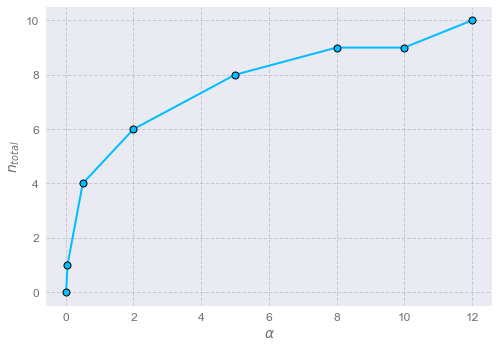

In [24]:
cant_oscilaciones = []
for i in range(len(amplitudes)):
    cant_oscilaciones.append(np.array(list(amplitudes[i])).shape[0])
plt.plot(alpha,cant_oscilaciones,'-o')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$n_{total}$')

##### - How many I and R oscillations? Is there a relationship? 

If we compute the number of total oscillations $n_{total}$ in I and in $R_t$ as functions of $\alpha$, we can see that both quantities are directly correlated. That means, the oscillations in S,I,R are associated with the ones in the reproductive number. 

In [25]:
cant_oscilaciones_i = []
amplitudes_i = []
freq_dist_i = []
for i in alpha:
    N = 10000
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,i,0.05,N,1/N,0.0,2000.0,1.0,8)
    a = I9
    peaksmax, _ = find_peaks(a, height=0)
    peaksmin, _ = find_peaks(-a,height=-2)
    if len(peaksmax)!=len(peaksmin):
        if len(peaksmax)>len(peaksmin):
            peaksmax = peaksmax[1:]
        else:
            peaksmin = peaksmin[1:]
    #print("dias de delay:", i)
    #plt.plot(a)
    #plt.plot(peaksmax, a[peaksmax], "x")
    #plt.plot(peaksmin, a[peaksmin], "x")
    #plt.plot(np.zeros_like(a), "--", color="gray")
    #amplitudes
    amplitudes_i.append(a[peaksmax]-a[peaksmin])
    #freq distancias
    freq_dist_i.append(([list(np.diff(np.array(peaksmax))),list(np.diff(np.array(peaksmin)))]))
for i in range(len(amplitudes)):
    cant_oscilaciones_i.append(np.array(list(amplitudes[i])).shape[0])

Text(0, 0.5, '$n_{total}$')

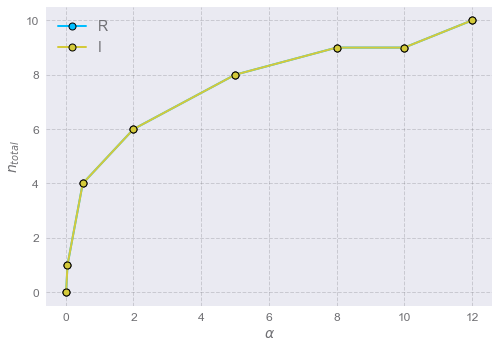

In [26]:
plt.plot(alpha,cant_oscilaciones,'-o',label='R')
plt.plot(alpha,cant_oscilaciones_i,'-o',label='I')
plt.legend(fontsize=14)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$n_{total}$')

##### - Frequency

In the next plot, we have the distance between two consecutive maxima and two consecutive minima of oscillations in $R_t$, as functions of $n$, which indexes the substracted oscillation (we do the substraction: maxima/minima of oscillation (n+1) - maxima/minima of oscillation (n), I guess I could explain in another part better) for different $\alpha$. We observe that the oscillations appear not to be exactly sinusoidal, more so when referring to oscillations with a higher $n$ number. Nevertheless, to get a better idea of the distance between them, we plot the mean of distances calculating according to local maxima and minima of $R_t$.

Text(0, 0.5, 'Distance')

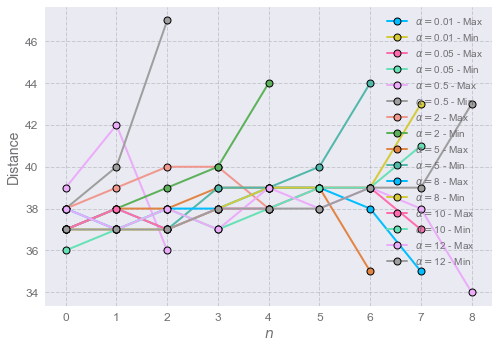

In [27]:
for i in range(len(freq_dist)):
    plt.plot(freq_dist[i][0],'-o',label=r'$\alpha=$'+str(alpha[i])+' - Max')
    plt.plot(freq_dist[i][1],'-o',label=r'$\alpha=$'+str(alpha[i])+' - Min')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Distance')

From this second graph, the distance between oscillations seems to be shorter for higher values of $\alpha$, and very similar for the highest values studied. This is also evident from inspection of the $R_t$ graphs, since all oscillations ocurr approximately from $t=0$ to $t=500$ at most, regardless the value of $\alpha$. 

Text(0, 0.5, 'Distance')

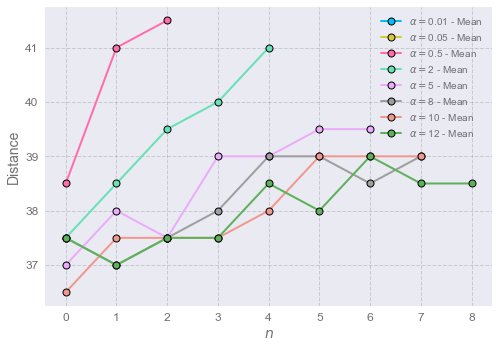

In [28]:
for i in range(len(freq_dist)):
    plt.plot((np.array(freq_dist[i][0])+np.array(freq_dist[i][1]))/2,'-o',label=r'$\alpha=$'+str(alpha[i])+' - Mean')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Distance')

### Evolution with changing $N$

Now, we repeat the previous analysis with different values of $N$, that's to say with different population sizes. In particular, we limit ourselves to populations in the range $10^3-10^6$, which are reasonable sizes for the rest of the fixed parameters. As we show in the next two graphs, there are oscillations in all cases, and they seem to be qualitatively similar. 

In [29]:
cant_oscilaciones = []
amplitudes = []
freq_dist = []
N = [1000,10000,100000,1000000]

Text(0, 0.5, 'I')

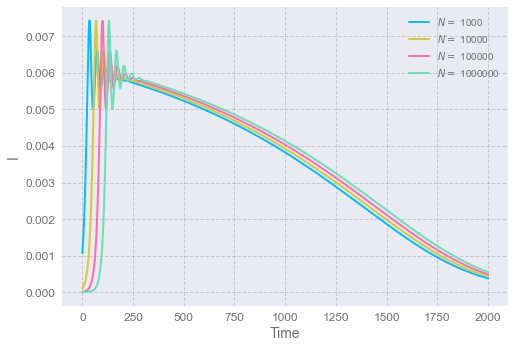

In [30]:
for i in N:
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,0.05,i,1/i,0.0,2000.0,1.0,8)
    plt.plot(I9,label=r'$N =$ '+str(i))
    plt.legend()
plt.xlabel('Time')
plt.ylabel('I')

Text(0, 0.5, '$R_t$')

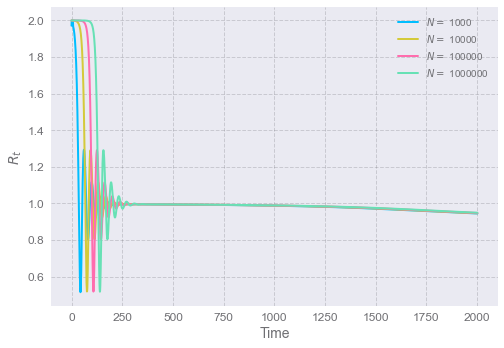

In [31]:
for i in N:
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,0.05,i,1/i,0.0,2000.0,1.0,8)
    plt.plot(b9*S9/(0.075),label=r'$N =$ '+str(i))
    plt.legend()
plt.xlabel('Time')
plt.ylabel(r'$R_t$')

##### - Amplitude

For changing values of $N$, we get that the relationship between the amplitude and $n$ is extremely similar. It's also reminiscent of what we observed before: higher values of amplitude for the first oscillations in the series, and these amplitudes tend to zero as $n$ increases. In semi-logarithmic scale, it appears to behave linearly for small $n$ values, meaning the first series oscillations. 

In [32]:
for i in N:
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,0.05,i,1/i,0.0,2000.0,1.0,8)
    a = b9*S9/(0.075)
    peaksmax, _ = find_peaks(a, height=0)
    peaksmin, _ = find_peaks(-a,height=-2)
    if len(peaksmax)!=len(peaksmin):
        if len(peaksmax)>len(peaksmin):
            peaksmax = peaksmax[1:]
        else:
            peaksmin = peaksmin[1:]
    #print("dias de delay:", i)
    #plt.plot(a)
    #plt.plot(peaksmax, a[peaksmax], "x")
    #plt.plot(peaksmin, a[peaksmin], "x")
    #plt.plot(np.zeros_like(a), "--", color="gray")
    #amplitudes
    amplitudes.append(a[peaksmax]-a[peaksmin])
    #freq distancias
    freq_dist.append(([list(np.diff(np.array(peaksmax))),list(np.diff(np.array(peaksmin)))]))
    #plt.show()

Text(0, 0.5, 'Amplitude')

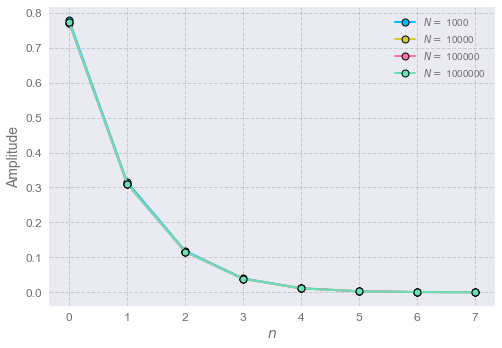

In [33]:
for i in range(len(amplitudes)):
    plt.plot(amplitudes[i],'-o',label=r'$N=$ '+str(N[i]))
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Amplitude')

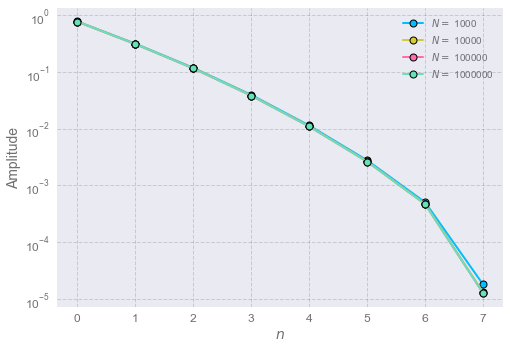

In [34]:
for i in range(len(amplitudes)):
    plt.plot(amplitudes[i],'-o',label=r'$N=$ '+str(N[i]))
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Amplitude')
plt.yscale('log')

##### - Amount of oscillations

Plotting the total number of oscillations $n_total$ as a function of the population size, we see that the number of oscillations is the exact same. In this case, this constant is $8$.

Text(0, 0.5, '$n_{total}$')

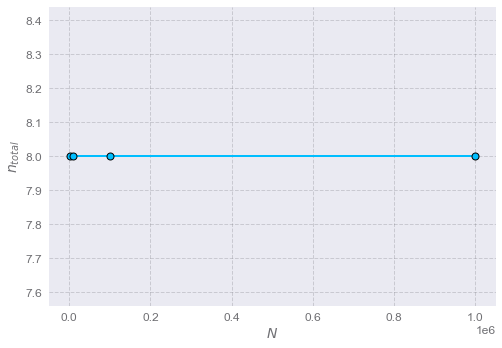

In [35]:
cant_oscilaciones = []
for i in range(len(amplitudes)):
    cant_oscilaciones.append(np.array(list(amplitudes[i])).shape[0])
plt.plot(N,cant_oscilaciones,'-o')
plt.xlabel(r'$N$')
plt.ylabel(r'$n_{total}$')

##### - Frequency or distance between oscillations

Repeating the same procedure to analyse oscillation frequency that we did before, we see that oscillations become more distaced while $n$ increases, since the distance grows. The values tend to be similar while changing $N$ in a range of various orders of magnitude.

Text(0, 0.5, 'Distance')

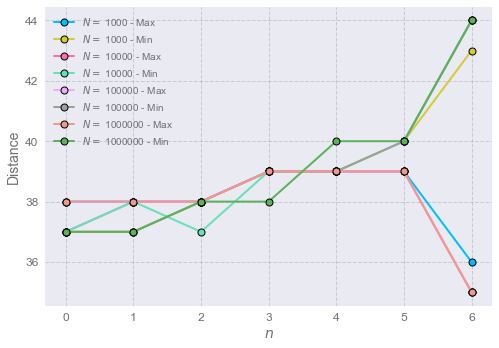

In [36]:
for i in range(len(freq_dist)):
    plt.plot(freq_dist[i][0],'-o',label=r'$N=$ '+str(N[i])+' - Max')
    plt.plot(freq_dist[i][1],'-o',label=r'$N=$ '+str(N[i])+' - Min')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Distance')

Text(0, 0.5, 'Distance')

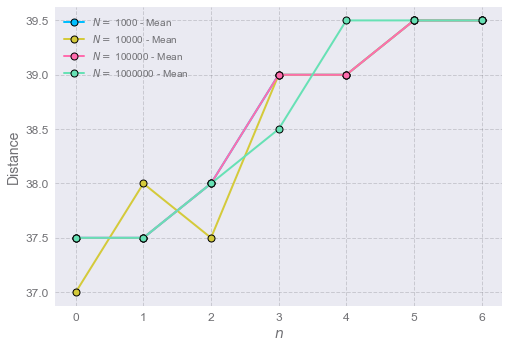

In [37]:
for i in range(len(freq_dist)):
    plt.plot((np.array(freq_dist[i][0])+np.array(freq_dist[i][1]))/2,'-o',label=r'$N=$ '+str(N[i])+' - Mean')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Distance')

### Evolution with changing $i_0$

Finally, we can change the parameter $i_0$, which indicates a scale for the proportion of people infected in a population. 

In [50]:
ios = [0.01,0.03,0.05,0.2,0.5,0.8,1]
cant_oscilaciones = []
amplitudes = []
freq_dist = []

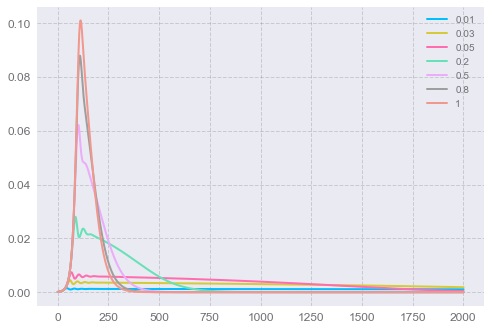

In [51]:
for i in ios:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,i,N,1/N,0.0,2000.0,1.0,8)
    plt.plot(I9,label=str(i))
    plt.legend()

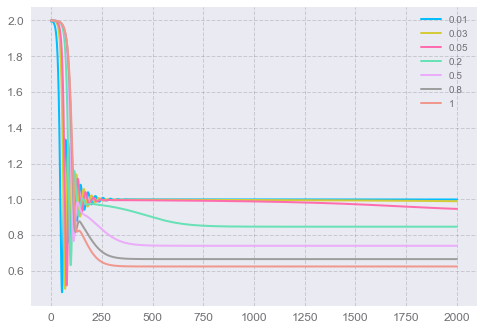

In [52]:
for i in ios:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,i,N,1/N,0.0,2000.0,1.0,8)
    if(min(b9)>0):
        plt.plot(b9*S9/(0.075),label=str(i))
    plt.legend()

In [53]:
for i in ios:
    N = 10000.0
    t9,S9,I9,R9,b9 = solve_sir_new_delay(2*0.075, 0.075,5,i,N,1/N,0.0,2000.0,1.0,8)
    a = b9*S9/(0.075)
    peaksmax, _ = find_peaks(a, height=0)
    peaksmin, _ = find_peaks(-a,height=-2)
    if len(peaksmax)!=len(peaksmin):
        if len(peaksmax)>len(peaksmin):
            peaksmax = peaksmax[1:]
        else:
            peaksmin = peaksmin[1:]
    #print("dias de delay:", i)
    #plt.plot(a)
    #plt.plot(peaksmax, a[peaksmax], "x")
    #plt.plot(peaksmin, a[peaksmin], "x")
    #plt.plot(np.zeros_like(a), "--", color="gray")
    #amplitudes
    amplitudes.append(a[peaksmax]-a[peaksmin])
    #freq distancias
    freq_dist.append(([list(np.diff(np.array(peaksmax))),list(np.diff(np.array(peaksmin)))]))
    #plt.show()

##### - Amplitude

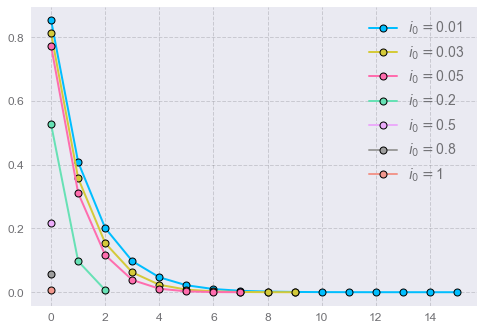

In [54]:
for i in range(len(amplitudes)):
    plt.plot(amplitudes[i],'-o',label=r'$i_0 =$'+str(ios[i]))
plt.legend(fontsize=14)

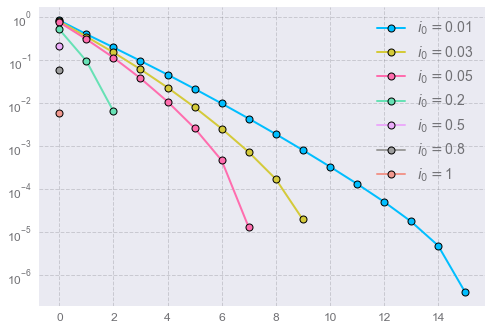

In [55]:
for i in range(len(amplitudes)):
    plt.plot(amplitudes[i],'-o',label=r'$i_0 =$'+str(ios[i]))
plt.yscale('log')
plt.legend(fontsize=14)

##### - Amount of oscillations

Text(0, 0.5, '$n_t$')

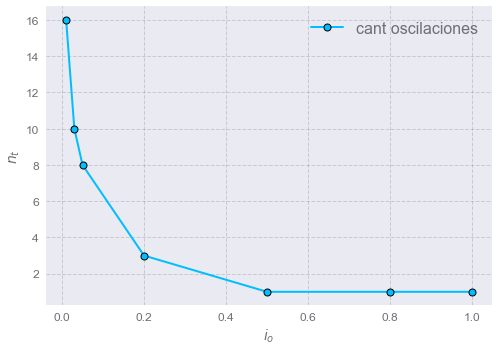

In [56]:
cant_oscilaciones = []
for i in range(len(amplitudes)):
    cant_oscilaciones.append(np.array(list(amplitudes[i])).shape[0])
plt.plot(ios,cant_oscilaciones,'-o',label='cant oscilaciones')
plt.legend(fontsize=16)
plt.xlabel(r'$i_o$')
plt.ylabel(r'$n_t$')

##### - Frequency

Text(0, 0.5, 'Distance')

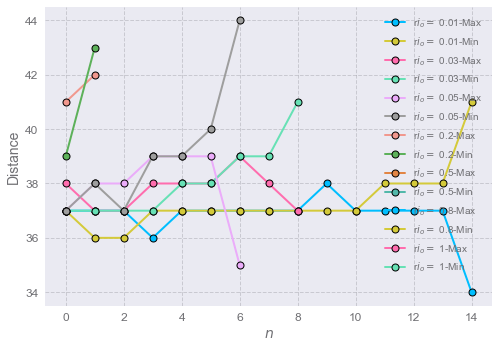

In [60]:
for i in range(len(freq_dist)):
    plt.plot(freq_dist[i][0],'-o',label='r$i_o=$ '+str(ios[i])+'-Max')
    plt.plot(freq_dist[i][1],'-o',label='r$i_o=$ '+str(ios[i])+'-Min')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Distance')

Text(0, 0.5, 'Distance')

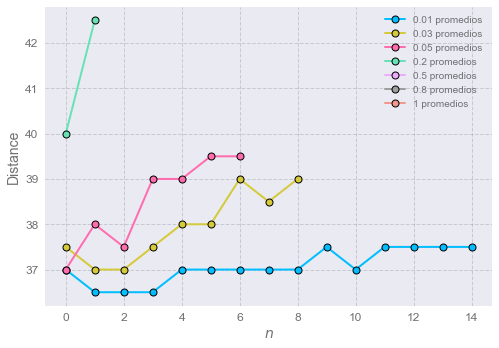

In [61]:
for i in range(len(freq_dist)):
    plt.plot((np.array(freq_dist[i][0])+np.array(freq_dist[i][1]))/2,'-o',label=str(ios[i])+' promedios')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('Distance')